## Partial derivative equations

A linear equation is defined as:

$$ y(x_{0},x_{1},\ldots,x_{n}) = b + m_{0} x_{0} + m_{1} x_{1} + \ldots + m_{n} x_{n} $$

To simplify, let's consider one slope `m` and one intercept `b`:

$$ y(x) = b + m x $$

Loss function is defined as:

$$ L(b,m)
 = \frac{1}{2N} \sum_{i=1}^N (y(x_{i}) - y_{i})^2
 = \frac{1}{2N} \sum_{i=1}^N (b + m x_{i} - y_{i})^2 $$

Let

$$ g(x) = \frac{1}{2N} \sum_{i=1}^N x^2 $$

$$ f(b,m) = b + m x_{i} - y_{i}  $$

Then we can rewrite loss function as:

$$ L(b,m) = \frac{1}{2N} \sum_{i=1}^N f(b,m)^2 = g(f(b,m)) $$

To calculate the gradient, we use chain rule:

$$ \frac{\partial}{\partial x} g(x)
 = \frac{\partial}{\partial x} (\frac{1}{2N} \sum_{i=1}^N x^2)
 = \frac{2}{2N} \sum_{i=1}^N x 
 = \frac{1}{N} \sum_{i=1}^N x $$

$$ \frac{\partial}{\partial b} f(b,m)
 = \frac{\partial}{\partial b} (b + m x_{i} - y_{i}) 
 = b^0 + 0 - 0
 = 1 $$

$$ \frac{\partial}{\partial m} f(b,m) 
 = \frac{\partial}{\partial m} (b + m x_{i} - y_{i})
 = 0 + x_{i} m^0 - 0
 = x_{i} $$

$$ \frac{\partial}{\partial b} L(b,m)
 = \frac{\partial}{\partial b} g(f(b,m))
 = \frac{\partial}{\partial b} g(f(b,m)) \cdot \frac{\partial}{\partial b} f(b,m)
 = \frac{\partial}{\partial b} g(b + m x_{i} - y_{i}) \cdot \frac{\partial}{\partial b} f(m,b)
 = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) $$

$$ \frac{\partial}{\partial m} L(b,m)
 = \frac{\partial}{\partial m} g(f(b,m))
 = \frac{\partial}{\partial m} g(f(b,m)) \cdot \frac{\partial}{\partial m} f(b,m)
 = \frac{\partial}{\partial m} g(b + m x_{i} - y_{i}) \cdot \frac{\partial}{\partial m} f(m,b)
 = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) x_{i} $$


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

## Function to calculate loss

$$ L(b,m) = \frac{1}{2N} \sum_{i=1}^N (b + m x_{i} - y_{i})^2 $$

In [2]:
def loss(b, m, points):
    total_error = 0.0
    n = len(points)
    for i in range(0, n):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (b + m * x - y) ** 2
    return total_error / (2.0 * float(n))

## Function to calculate gradient

$$ \frac{\partial}{\partial b} L(b,m) = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) $$

$$ \frac{\partial}{\partial m} L(b,m) = \frac{1}{N} \sum_{i=1}^N (b + m x_{i} - y_{i}) x_{i} $$

In [3]:
def gradient(b, m, points):
    gradient_b = 0.0
    gradient_m = 0.0
    n = len(points)
    for i in range(0, n):
        x = points[i, 0]
        y = points[i, 1]
        tmp = b + m * x - y
        gradient_b += tmp
        gradient_m += tmp * x
    gradient_b = gradient_b / (float(n))
    gradient_m = gradient_m / (float(n))
    return gradient_b, gradient_m

## Fit ourselves

In [4]:
points = np.genfromtxt("linear_regression_data.csv", delimiter=",")
learning_rate = 0.00001
b = random.uniform(0, 5.0)
m = random.uniform(0, 5.0)
num_iterations = 2000

print("b = %f  m = %f  error = %f" % (b, m, loss(b, m, points)))

for i in range(num_iterations):
    gradient_b, gradient_m = gradient(b, m, points)
    b -= learning_rate * gradient_b
    m -= learning_rate * gradient_m
    #print("[%d] b = %f  m = %f  error = %f" % (i, b, m, loss(b, m, points)))
    
print("b = %f  m = %f  error = %f" % (b, m, loss(b, m, points)))

def predict(x):
    y = b + m * x
    print("y(%f) = %f" %(x, y))

predict(10.23456)
predict(40.23454)
predict(32.39456)
predict(88.23453)

b = 0.984528  m = 3.837347  error = 7094.408056
b = 0.943144  m = 1.460955  error = 56.066343
y(10.234560) = 15.895375
y(40.234540) = 59.723992
y(32.394560) = 48.270135
y(88.234530) = 129.849812


## Fit using scikit

In [5]:
# verify with scikit-learn
model = LinearRegression()
x_values = points[:, 0].reshape(-1, 1)
y_values = points[:, 1].reshape(-1, 1)
model.fit(x_values, y_values)
b_ = model.intercept_[0]
m_ = model.coef_[0]
print("b = %f  m = %f  error = %f" % (b_, m_, loss(b_, m_, points)))

def predict_(x):
    y = b_ + m_ * x
    print("y(%f) = %f   y(%f) = %f" %(x, y, x, model.predict(x)))

predict_(10.23456)
predict_(40.23454)
predict_(32.39456)
predict_(88.23453)

b = 7.991021  m = 1.322431  error = 55.128692
y(10.234560) = 21.525521   y(10.234560) = 21.525521
y(40.234540) = 61.198425   y(40.234540) = 61.198425
y(32.394560) = 50.830592   y(32.394560) = 50.830592
y(88.234530) = 124.675101   y(88.234530) = 124.675101


## Plot our line and scikit line

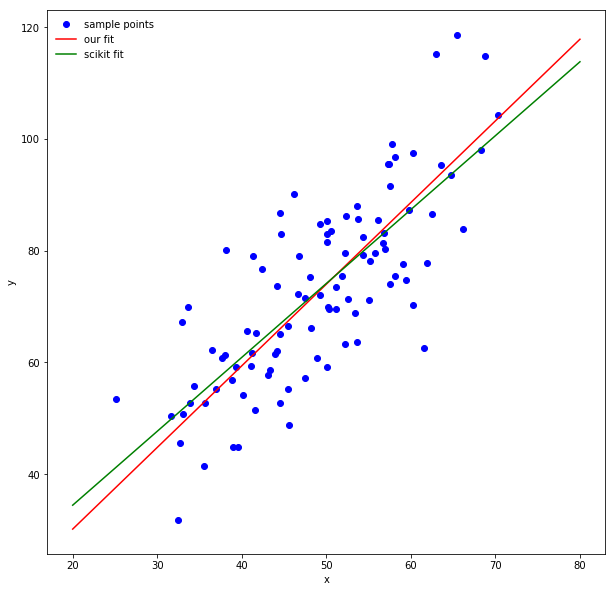

In [6]:
plot_x = np.linspace(20, 80, num=100)
plot_y1 = [ b + m * x for x in plot_x]
plot_y2 = [ b_ + m_ * x for x in plot_x]

plt.figure(figsize=(10,10))
plt.plot(points[:, 0], points[:, 1], "o", color="blue", label="sample points")
plt.plot(plot_x, plot_y1, color="red", label="our fit")
plt.plot(plot_x, plot_y2, color="green", label="scikit fit")
plt.legend(loc='upper left', frameon=False)
plt.xlabel("x")
plt.ylabel("y")

## Gradient descent animation

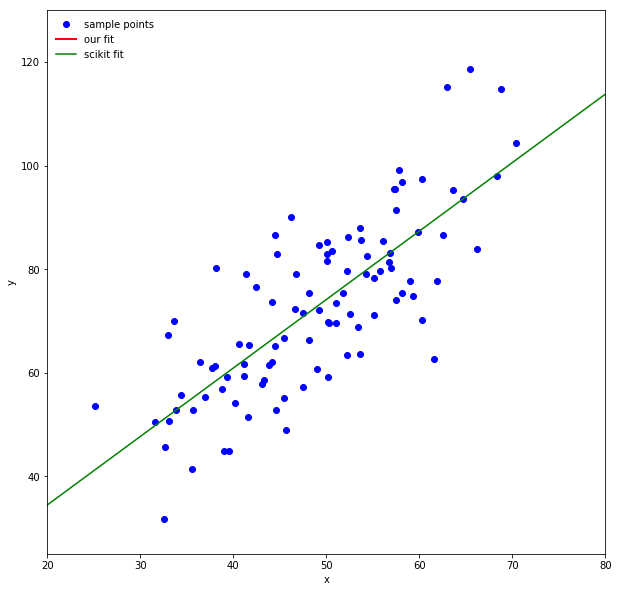

In [7]:
points = np.genfromtxt("linear_regression_data.csv", delimiter=",")

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim((20, 80))
ax.set_ylim((25, 130))

plt.plot(points[:, 0], points[:, 1], "o", color="blue", label="sample points")
line, = ax.plot([], [], lw=2, color='red', label="our fit")
plt.plot(plot_x, [ b_ + m_ * x for x in plot_x], color="green", label="scikit fit")
plt.legend(loc='upper left', frameon=False)
plt.xlabel("x")
plt.ylabel("y")

In [8]:
learning_rate = 0.00001
b = random.uniform(0.0, 5.0)
m = random.uniform(0.0, 5.0)
num_iterations = 250

bs = []
ms = []

for i in range(num_iterations):
    gradient_b, gradient_m = gradient(b, m, points)
    b -= learning_rate * gradient_b
    m -= learning_rate * gradient_m
    bs.append(b)
    ms.append(m)

plot_x = np.linspace(20, 80, num=100)

def plot_y(b, m):
    return [b + m * x for x in plot_x]

# initialization function: plot the background of each frame
def init():
    line.set_data(plot_x, plot_y(b, m))
    return (line,)

# animation function. This is called sequentially
def animate(i):
    b = bs[i]
    m = ms[i]
    line.set_data(plot_x, plot_y(b, m))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_iterations, interval=20, blit=True)

rc('animation', html='html5')
anim

## Example from Udacity

In [9]:
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])
# Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)
print("life expectancy of Laos is %f" % laos_life_exp)

life expectancy of Laos is 60.315647
